<a href="https://colab.research.google.com/github/lanashin/Projects/blob/main/ML_Cyber_Security_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## Introduction:

According to Nelson Report, losses from credit card frauds will reach more than forty billion dollars by the 2027 year. For payments, the cash is used less than before and its place took credit card transactions, especially online payments. This introduces new targets and new risks because attackers constantly try to steal this information from the internet and use it for their own purposes. With a growing amount of data, it has become impossible for a human analyst to detect fraud patterns in transaction datasets. It’s where Machine Learning Techniques can play an important role to identify fraudulent patterns from a large volume of data.

In this research, I use a dataset that was downloaded from Kaggle.com website,  which transactions made online by credit cards in September 2013. Information was collected based on data from European cardholders.

The transactions occurred in 2 days, and they contain only numerical input variables from 28 ‘Principal Component Analysis (PCA) transformed features, namely v1 to v28. This idea is made from confidential reasons to protect personal data that was collected from real people and not to expose it during this learning-process study.

The dataset also contains not transformed data that is represented in three columns, “Time”, “Amount” and “Class.”

‘Time’ contains the seconds elapsed between each transaction.
‘Amount’ shows the transaction amount.

‘Class’ is the response variable, and it takes value 1 if it's fraud and 0 otherwise.


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams["figure.figsize"] = 14,8
RANDOM_SEED = 42
LABELS  = ["Normal Transactions", "Fraud Transactions"]

import plotly.express as px#visualization
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/creditcard 2.csv", sep = ',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

### Exploratory Data Analysis


In [ ]:
#we are looking if df has null values that has to be replaced, the result is zero.
df.isnull().sum().max()

0

Another way to check null values. On using info() function we can check if any of the columns contain null values. Looking at the output it can be seen that all the 31 columns have non-null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Text(0, 0.5, 'Frequency')

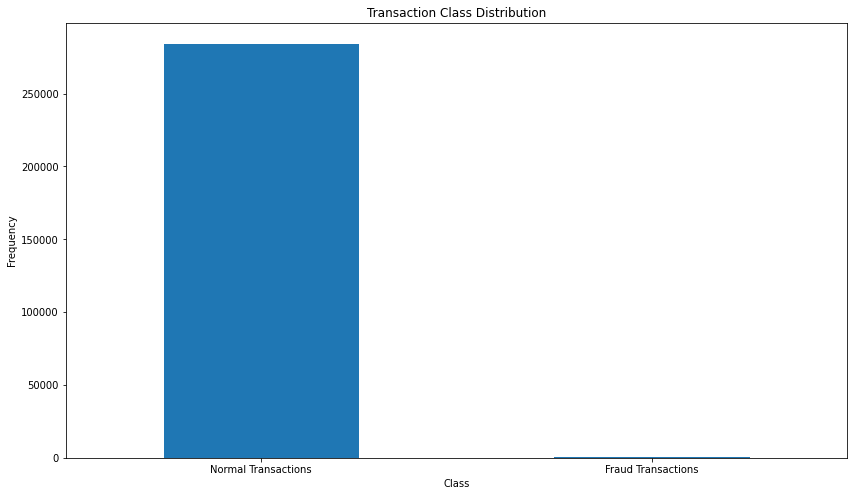

In [ ]:
#taking the last column = 'Class' and checking 0 or 1 to see if its fraud or normal transaction
#0 means:Normal
#1 means: Fraud
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")


In [ ]:
fraud = df[df["Class"]==1]
normal  = df[df["Class"]==0]
print(fraud.shape,normal.shape)


(492, 31) (284315, 31)


In [ ]:
#we can see it in percentage too
print("Normal transactions", round(df["Class"]. value_counts()[0]/len(df)*100,2), "% of the dataset")
print("Fraud transactions", round(df["Class"]. value_counts()[1]/len(df)*100,2), "% of the dataset")

Normal transactions 99.83 % of the dataset
Fraud transactions 0.17 % of the dataset


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

From this table we can learn that the minimum amount for fraud transactions was 0.000 and the max amount was 2,125.87 dollars.
The average fraud transactions were 122.211$ and fraud transactions happened about 492 times.

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

From this table we can learn that the minimum amount for normal transactions was 0.000 and the max amount was 25,691.160 dollars. The average fraud transactions were 88.291$ and normal transactions happened about 284,315 times.

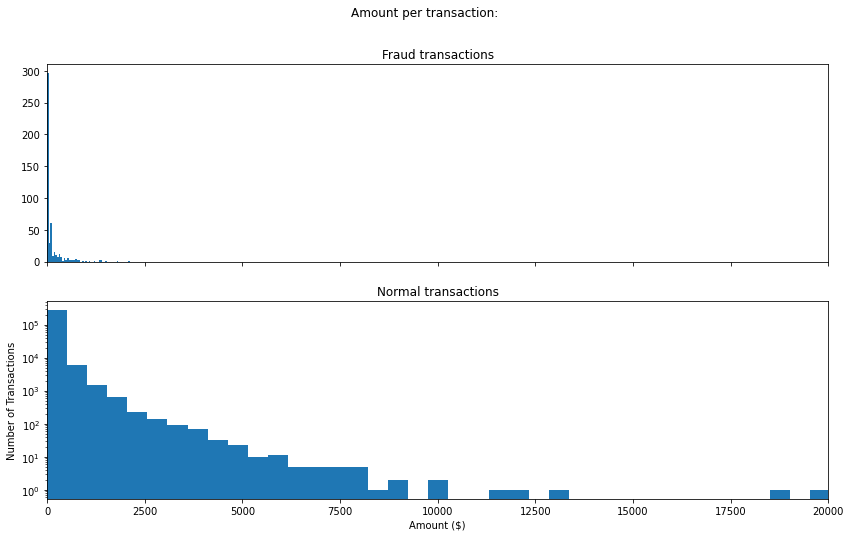

In [ ]:
#fraud/normal amounts histogram presintation
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction:')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud transactions')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

We can see that the data is coompletely unbalanced using some techniques we will fix it later

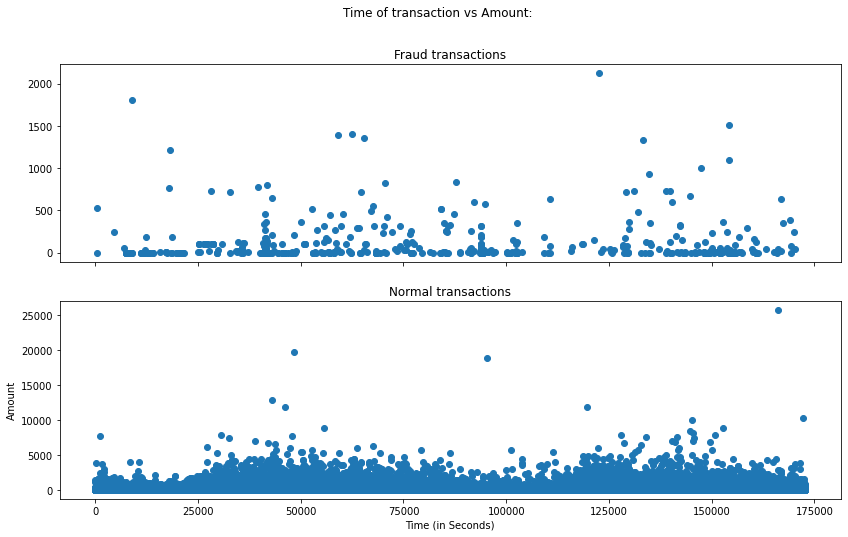

In [ ]:
#showing amounts of data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount:')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud transactions')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal transactions')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Next we will take data sample out of all this big data set.

In [ ]:
data1 = df.sample(frac = 0.1, random_state =1)
data1.shape

(28481, 31)

In [ ]:
#determine number of Fraud and valid transactions in the dataset
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
#print the outlier fraction and number of Fraud and Valid Transaction cases
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


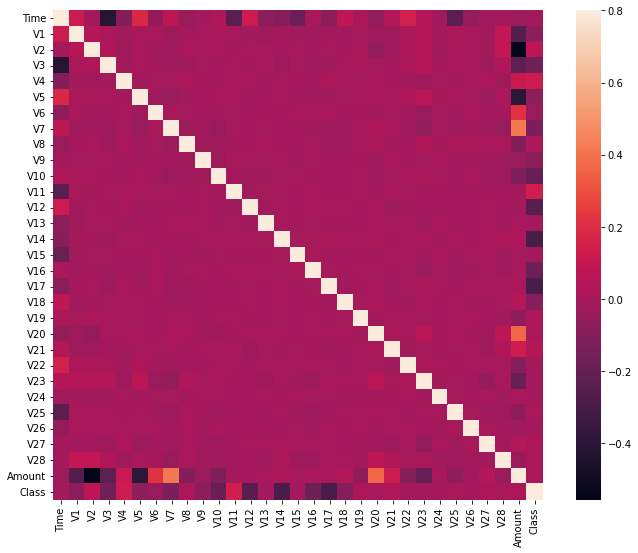

In [ ]:
#The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other
# however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


## Model Prediction

The last part is model prediction. The types of algorithms we decide to use to try to do anomaly detection on this dataset are Isolation Forest and Local Outlier Factor (LOF) algorithm.

### Isolation Forest Algorithm

Isolation Forest algorithm, “using isolation (how far a data point is to the rest of the data), rather than modelling the normal points.” Based on the information that anomalies are data points that are different and few. Anomalies indicate mechanism called isolation. This technique builds a model with a small number of trees, using smaller samples of fixed sizes, regardless of the size of dataset.

The way that this model created the separation is by first creating random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The Local Outlier Factor (LOF) algorithm is an unsupervised outlier detection method which calculates the local density deviation of a given data point with respect to its neighbors. It studies the outliers as samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen in one of two cases. First case is if it greater than the minimum number of objects a cluster must contain, so that other objects can be local outliers corresponding to this cluster.

Second case is it if smaller than the maximum number of close by objects that can seemingly be local outliers.




In [ ]:
#Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)

}

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



## Observations :
Observations of 2 Machine Learning model:

 * **Errors**

Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors.

Isolation Forest has a 99.74% more accurate than LOF of 99.65%.

* **Precision and recall**

The Isolation Forest performed much better (27%) than the LOF (2%).

Learning from this that Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

What we learn by these numbers that we chose the right models to compare 2 modules with outliers.

* **Ways to improve** and get to get better accuracy in determining more fraudulent cases is using complex anomaly detection models.
